In [2]:
import os

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns

In [20]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,f1_score

In [29]:
df=pd.read_csv('church.csv')

In [30]:
df.head(2)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3                2.7   
1                13.7                 3                3.7   

   customer service calls  churn  
0                       1  False  
1                       1  False  

[2 rows x 21 columns]

In [31]:
df.shape

(3333, 21)

In [32]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [33]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


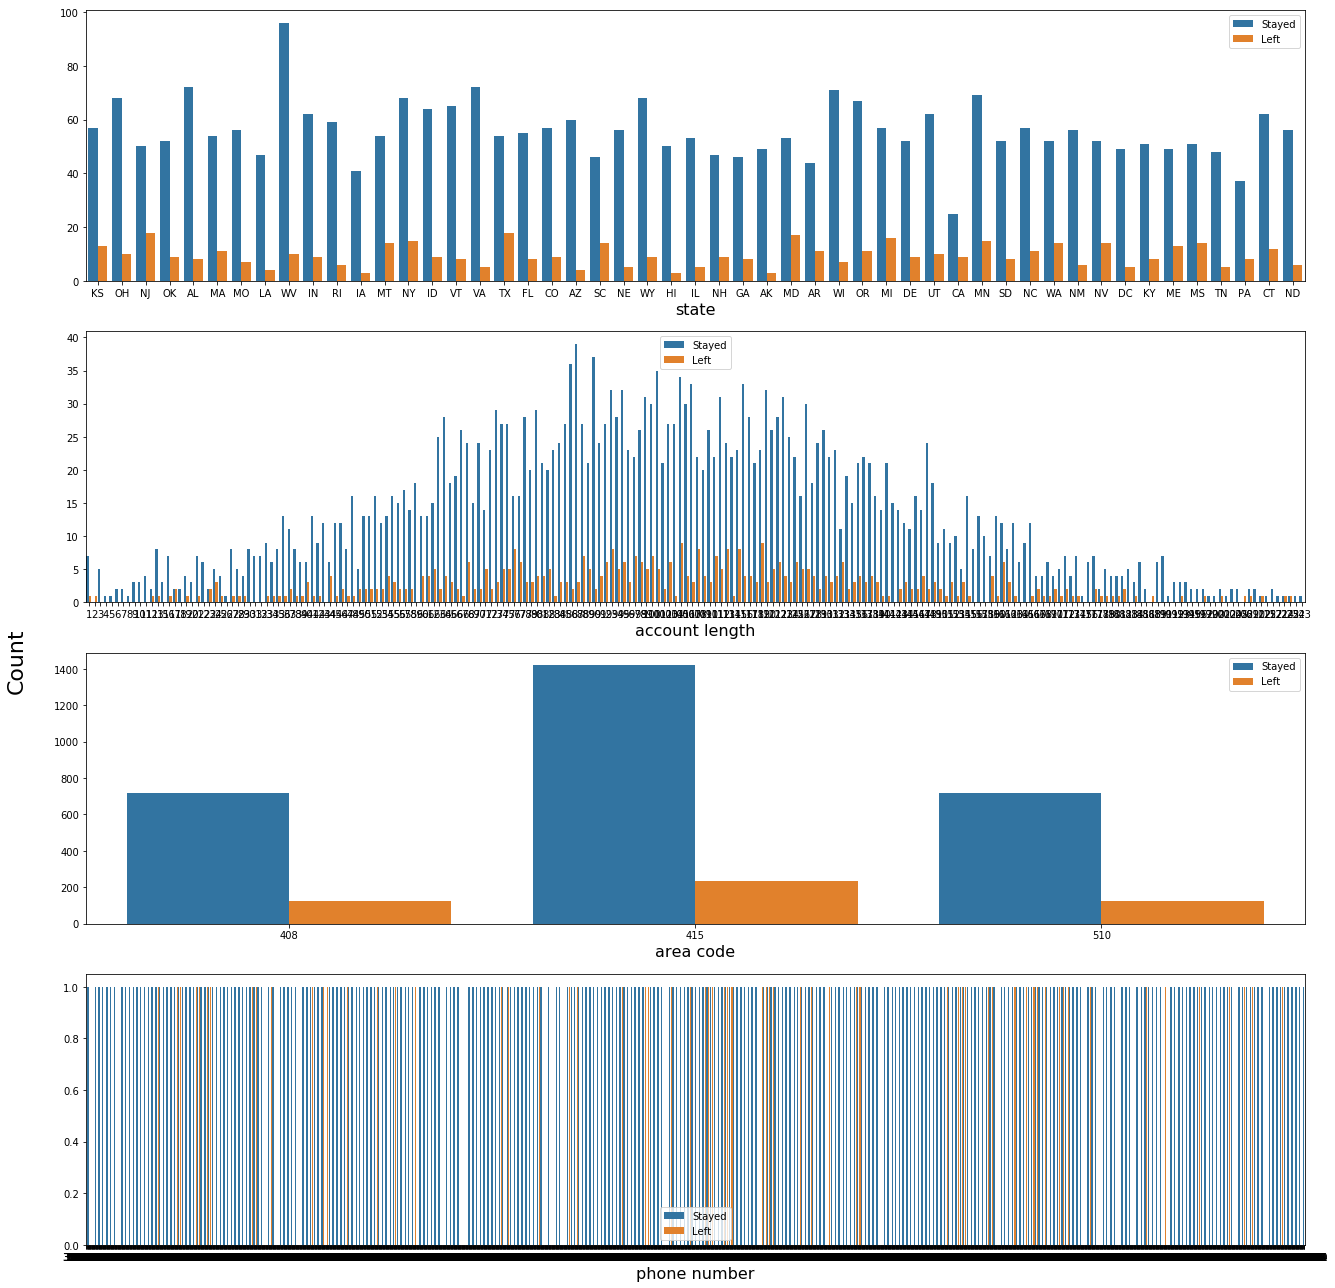

In [34]:
f, axes = plt.subplots(4, 1, figsize=(18,18), tight_layout=True)
x_vars = ['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
for ax, x in zip(axes, x_vars):
    sns.countplot(x=x, hue='churn', data=df, ax=ax)
    ax.set_xlabel(x, size=16)
    ax.set_ylabel("")
    ax.legend(['Stayed', 'Left'])

f.text(x=-0.0275, y=0.5, s='Count', rotation=90, size=22)
plt.show()

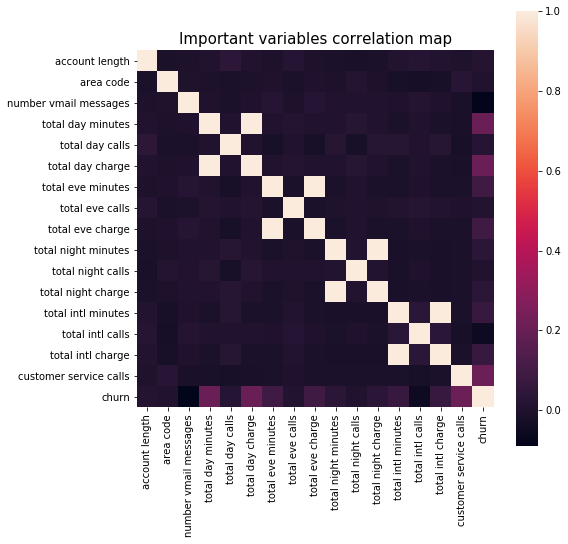

In [9]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


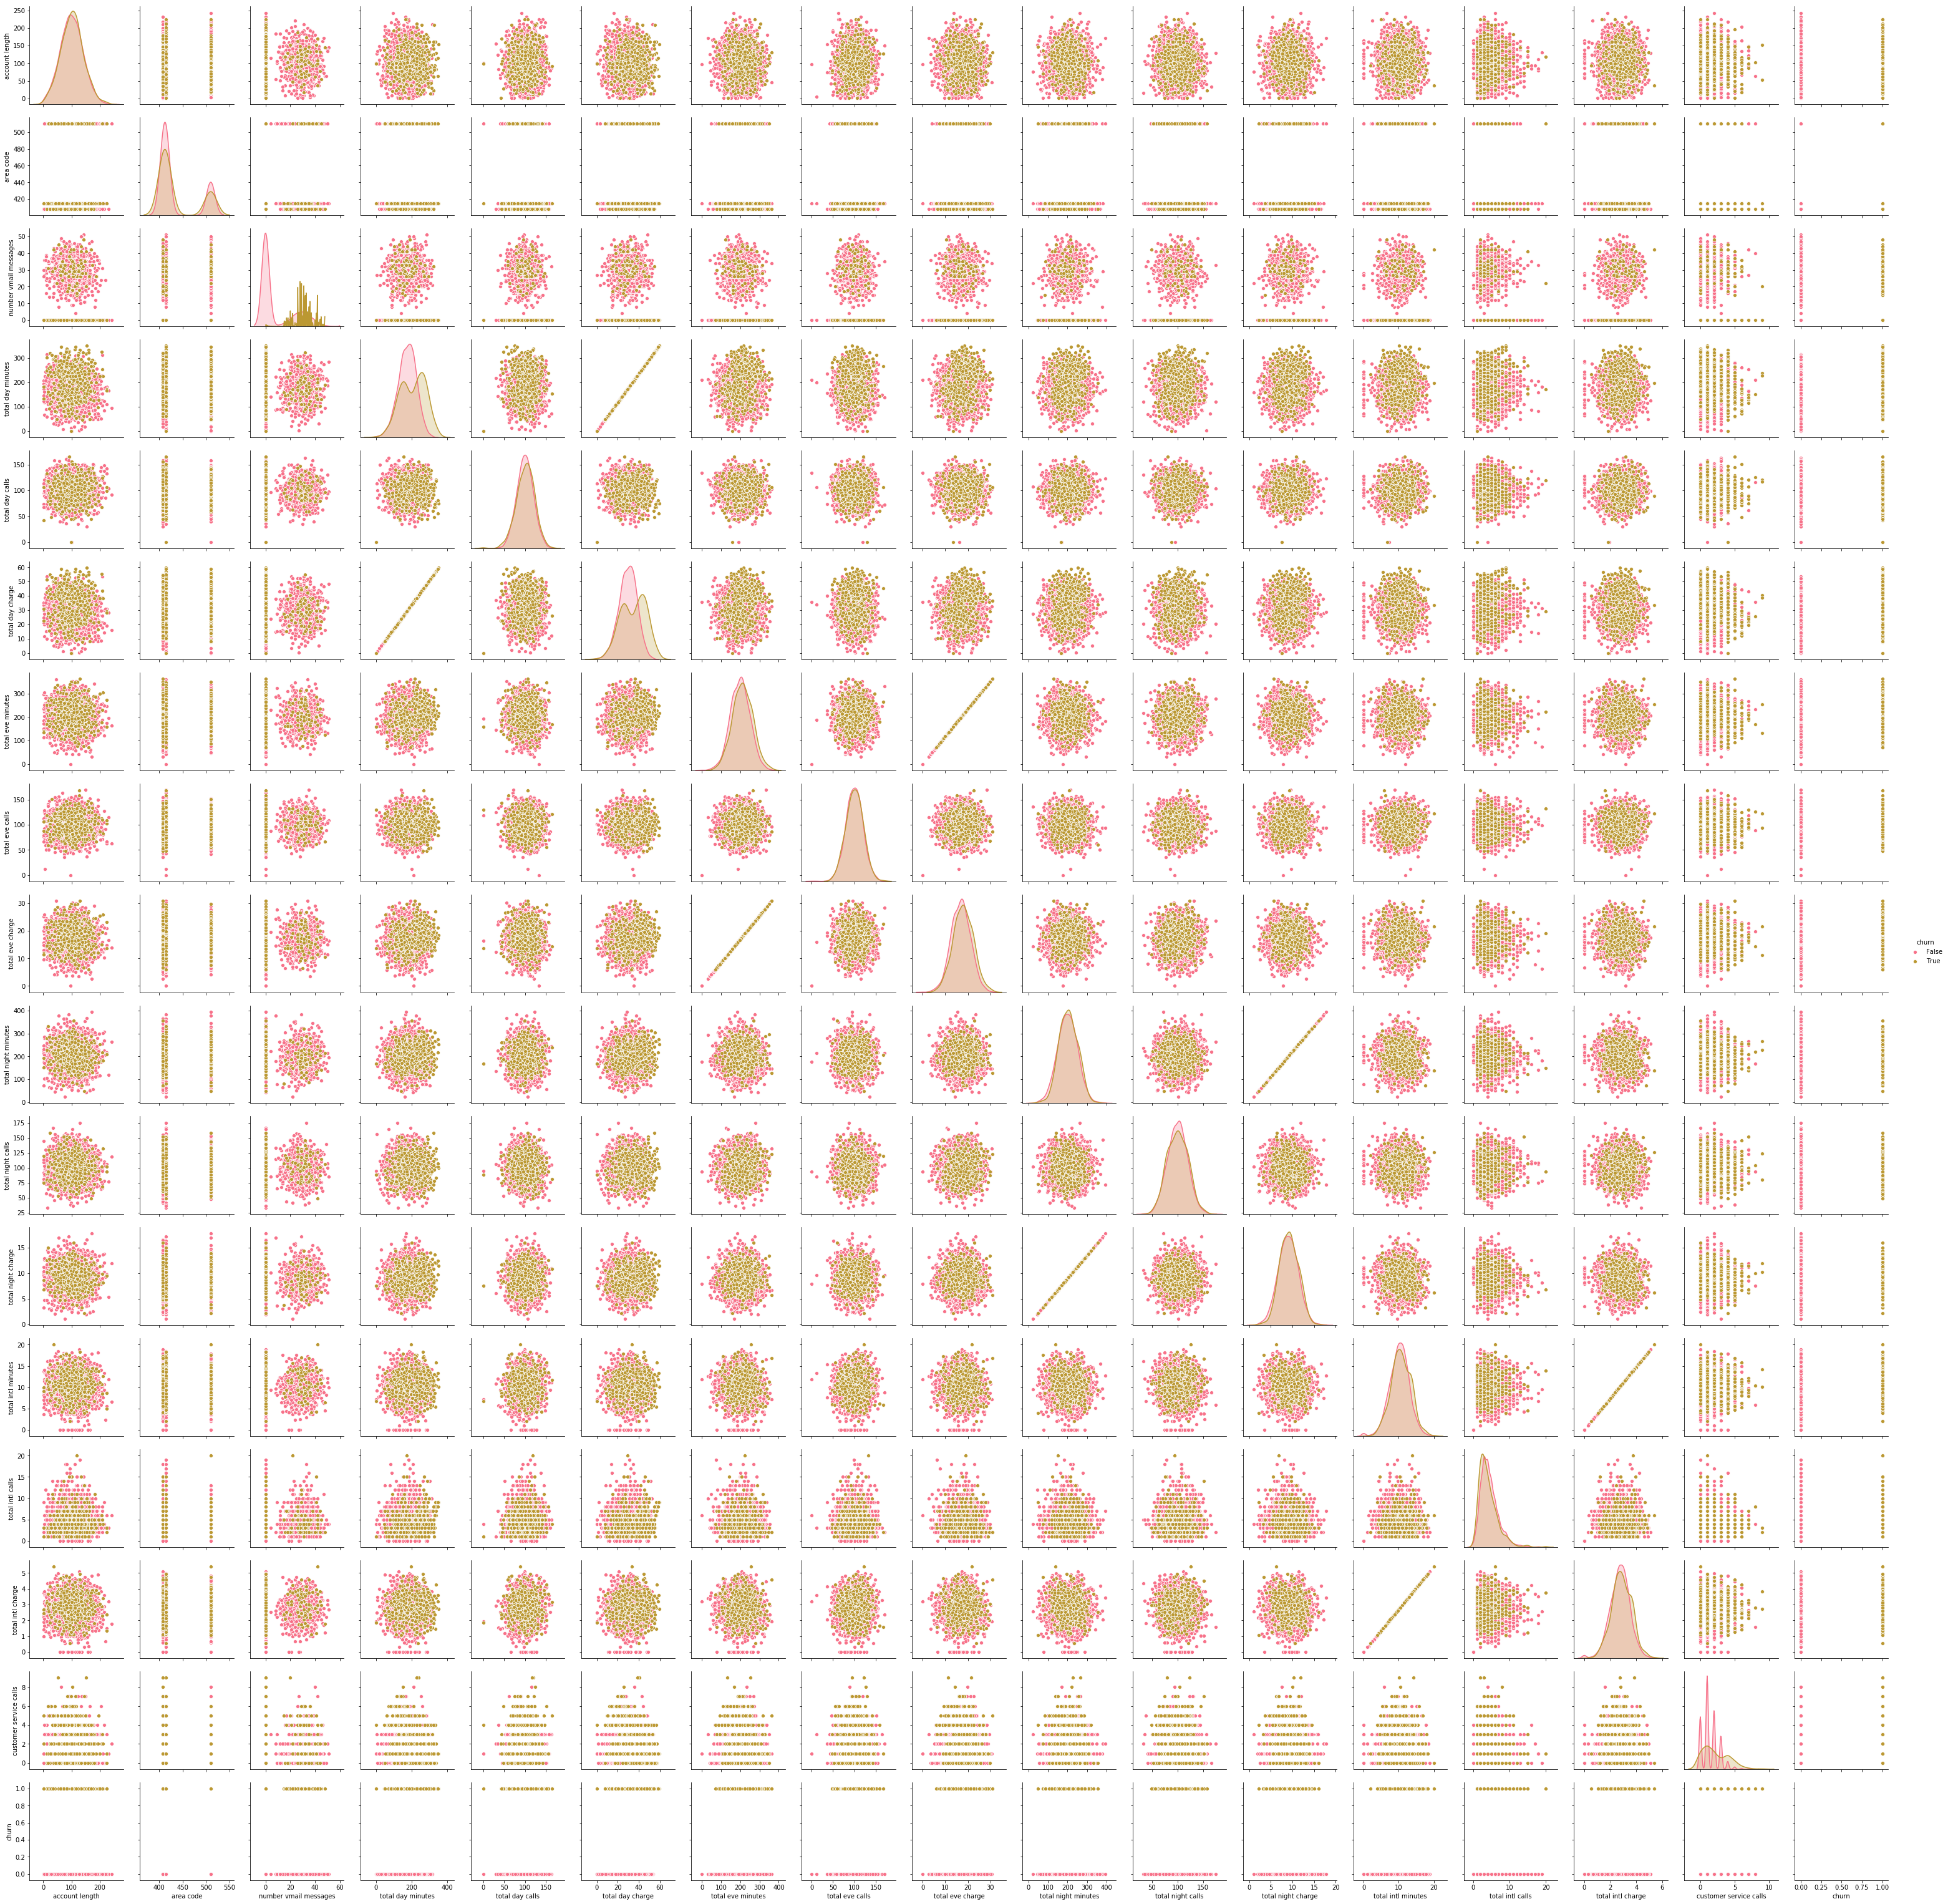

In [37]:
sns.pairplot(df,hue='churn',
             palette = sns.color_palette("husl"), size=2.5)

AxesSubplot(0.125,0.125;0.775x0.755)


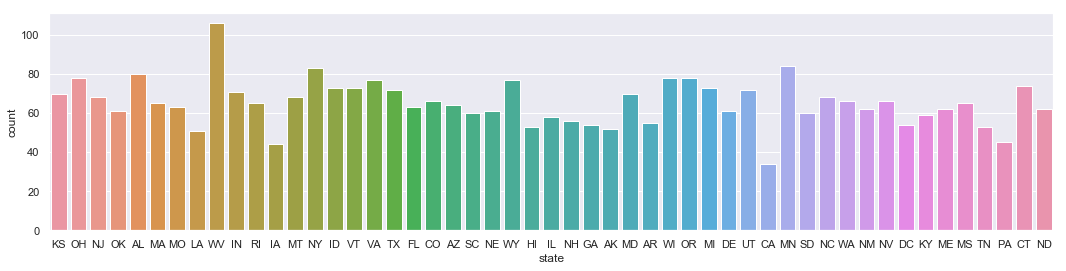

In [38]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df.state))

AxesSubplot(0.125,0.125;0.775x0.755)


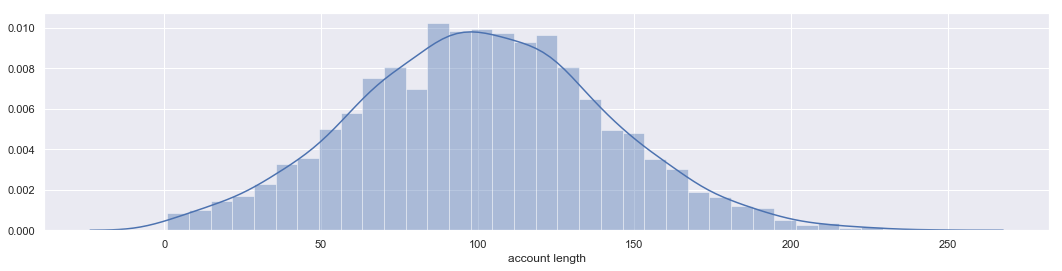

In [40]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.distplot(df['account length']))

AxesSubplot(0.125,0.125;0.775x0.755)


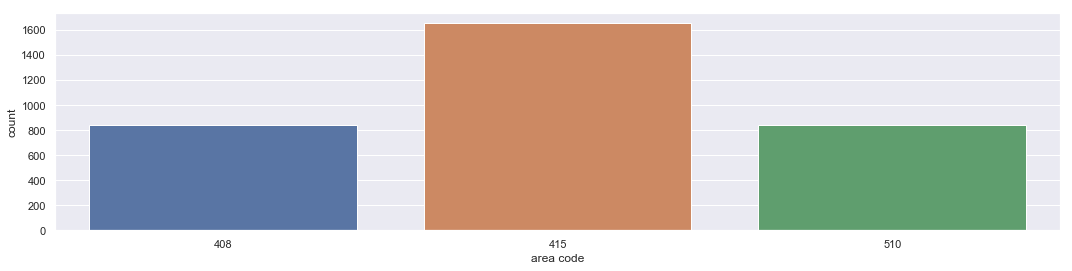

In [41]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['area code']))

AxesSubplot(0.125,0.125;0.775x0.755)


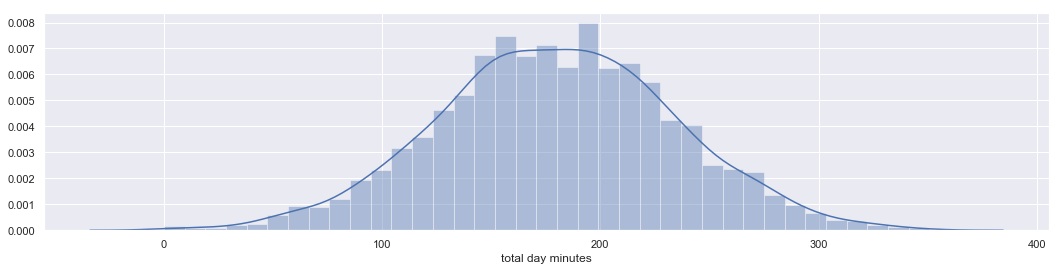

In [48]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.distplot(df['total day minutes']))

AxesSubplot(0.125,0.125;0.775x0.755)


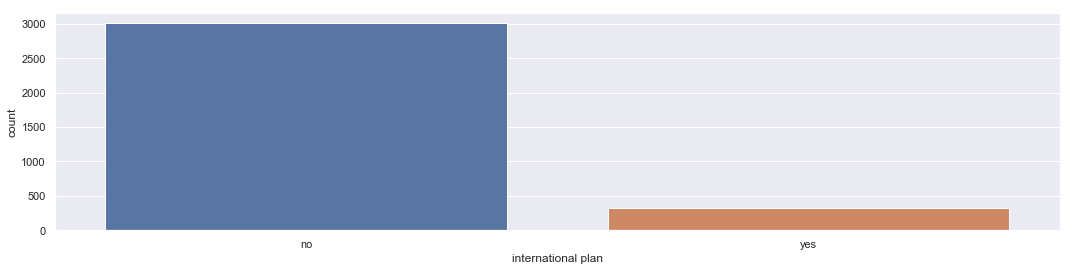

In [43]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['international plan']))

AxesSubplot(0.125,0.125;0.775x0.755)


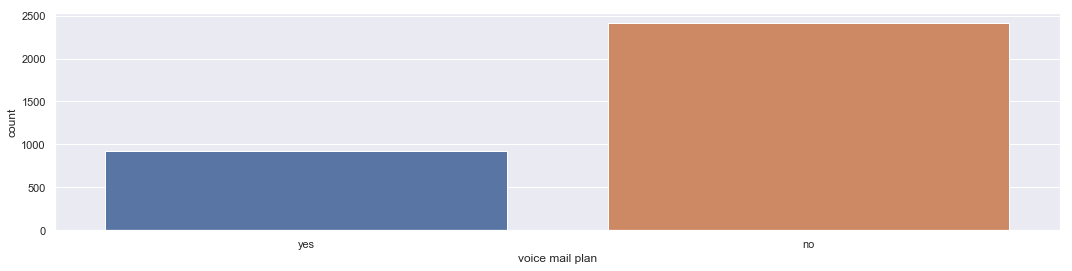

In [46]:
plt.figure(figsize=(18,4))
sns.set()
print(sns.countplot(df['voice mail plan']))

AxesSubplot(0.125,0.125;0.775x0.755)


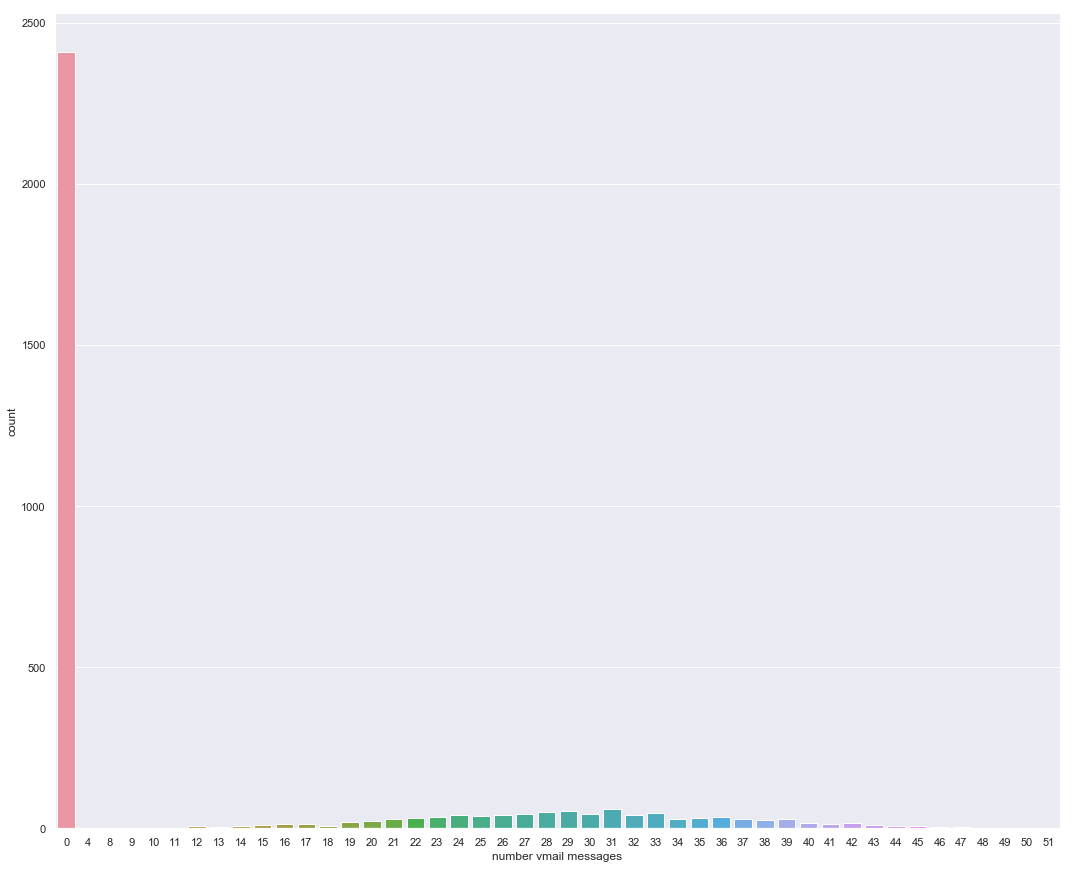

In [49]:
plt.figure(figsize=(18,15))
sns.set()
print(sns.countplot(df['number vmail messages']))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


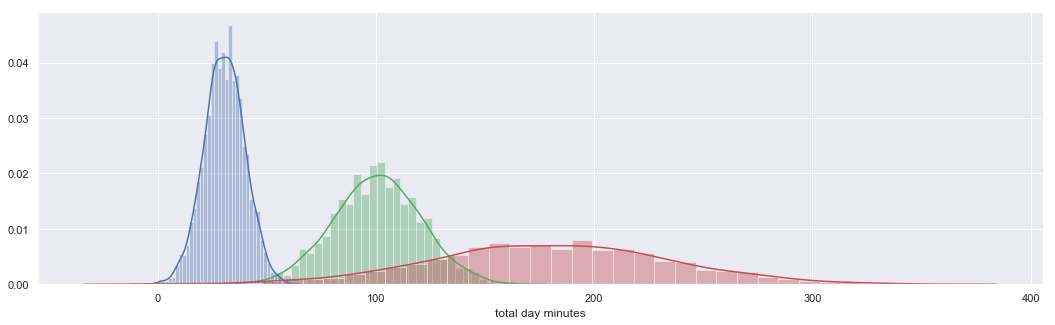

In [62]:
plt.figure(figsize=(18,5))
sns.set()
print(sns.distplot(df['total day calls'],color='g'))
print(sns.distplot(df['total day charge'],color='b'))
print(sns.distplot(df['total day minutes'],color='r'))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


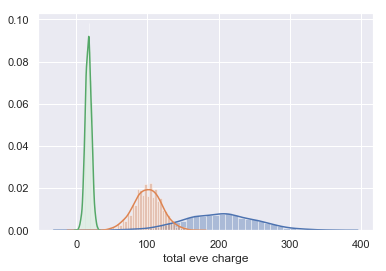

In [56]:
print(sns.distplot(df['total eve minutes']))
print(sns.distplot(df['total eve calls']))
print(sns.distplot(df['total eve charge']))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


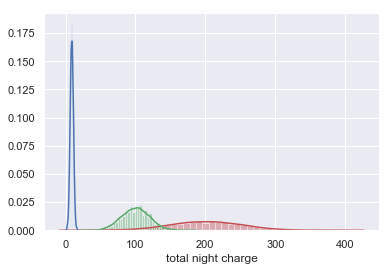

In [54]:
print(sns.distplot(df['total night minutes'],color='r'))
print(sns.distplot(df['total night calls'],color='g'))
print(sns.distplot(df['total night charge'],color='b'))

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


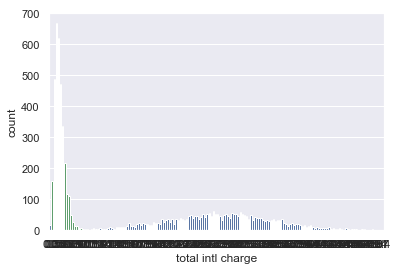

In [66]:
print(sns.countplot(df['total intl minutes'],color='r'))
print(sns.countplot(df['total intl calls'],color='g'))
print(sns.countplot(df['total intl charge'],color='b'))

AxesSubplot(0.125,0.125;0.775x0.755)


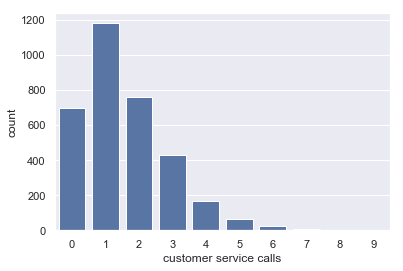

In [65]:
print(sns.countplot(df['customer service calls'],color='b'))

In [27]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [10]:
cate = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]
le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [11]:
y = df['churn']
df = df = df.drop(['churn'],axis=1)

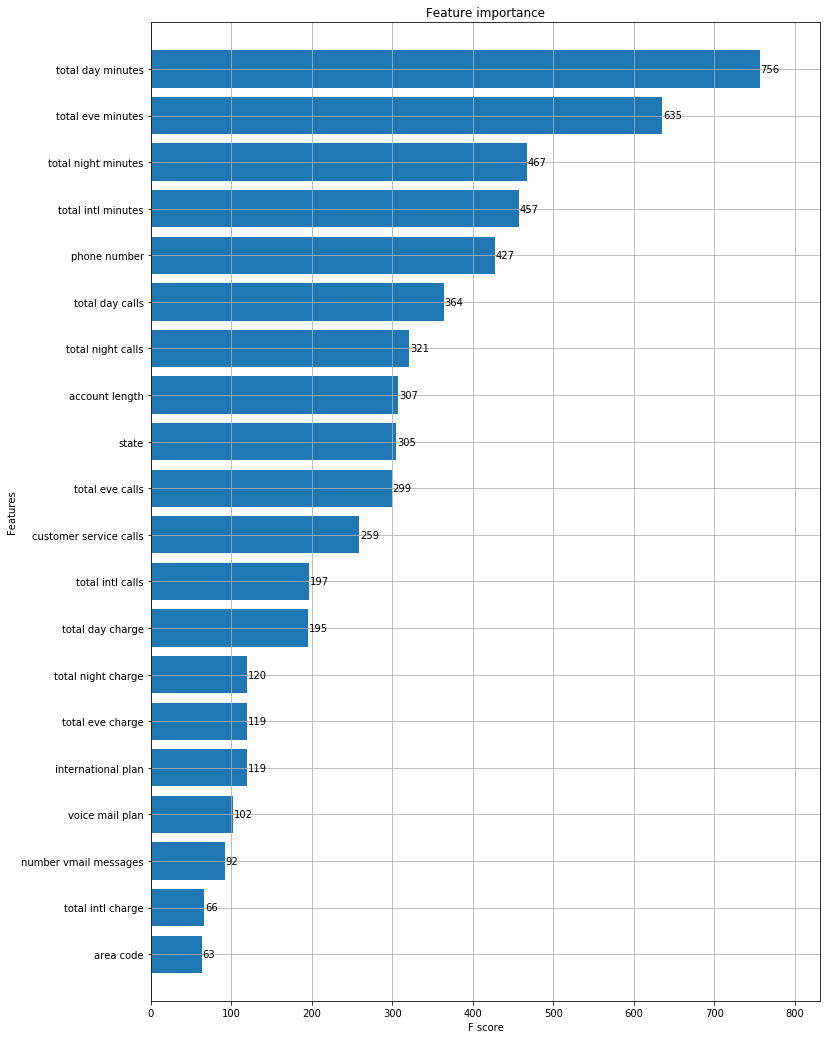

In [14]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(df, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [15]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)


(2999, 20) (334, 20) (2999,) (334,)


In [16]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
xg = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9431137724550899
auc 0.845425407925408


In [22]:
print ("The f1 score of model 3 : ", f1_score(yvalid, predictions, average = 'binary'))

The f1 score of model 3 :  0.7816091954022988


In [18]:
print("Confusion Matrix on Test Data")
pd.crosstab(yvalid, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted    0   1  All
True                   
0          281   5  286
1           14  34   48
All        295  39  334

# ExraTreesClassifier

In [23]:
clf = ExtraTreesClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
etc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]


accuracy_score 0.9191616766467066
auc 0.7274184149184149


In [24]:
print ("The f1 score of model 3 : ", f1_score(yvalid, predictions, average = 'binary'))

The f1 score of model 3 :  0.619718309859155


In [25]:
print("Confusion Matrix on Test Data")
pd.crosstab(yvalid, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix on Test Data


Predicted    0   1  All
True                   
0          285   1  286
1           26  22   48
All        311  23  334